<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
DSCI5240 Exam 1 Spring 2024
</p><br>

In [2]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Import the libraries and the dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
churn = pd.read_csv('TelcoChurn.csv')

In [11]:
churn.shape

(7043, 21)

In [12]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

1) Display basic information about the dataset.

In [13]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2). Explore the variable 'churn' with a graph.

In [15]:
type('Churn')

str

In [19]:
churn_counts = churn['Churn'].value_counts()
churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

<Figure size 800x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Churn Distribution')

Text(0.5, 0, 'Churn Status')

Text(0, 0.5, 'Number of Customers')

([<matplotlib.axis.XTick at 0x130d3a010>,
 [Text(0, 0, 'Not Churned'), Text(1, 0, 'Churned')])

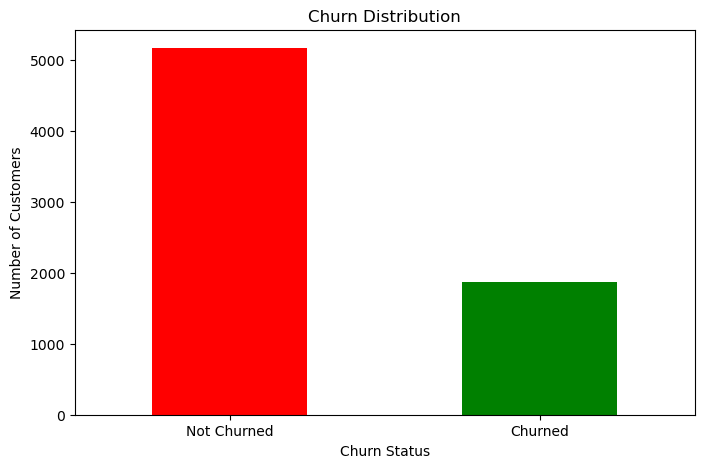

In [24]:
plt.figure(figsize=(8, 5))  # Set the figure size (optional)
churn_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)  # Set custom labels for the x-axis
plt.show()

3). We will run a logistic regression model that predicts 'Churn'. Prepare the data. Hint: consider using patsy as we have done in class practice.

Use the following variables:
'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'InternetService',
      'MonthlyCharges'

In [26]:
import patsy

y, X = patsy.dmatrices('Churn ~ gender + SeniorCitizen + Partner + Dependents\
                       + tenure + MultipleLines + InternetService + MonthlyCharges',
                      data = churn,
                      return_type = 'dataframe')

In [28]:
X # After using patsy, it created a dummy variable for all the categorical variables by 
#using (n-1). and also adding Intercept to the columns.

,Intercept,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],MultipleLines[T.No phone service],MultipleLines[T.Yes],InternetService[T.Fiber optic],InternetService[T.No],SeniorCitizen,tenure,MonthlyCharges
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.85
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,56.95
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,53.85
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,24.0,84.80
7039,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,72.0,103.20
7040,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,29.60
7041,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,74.40


In [30]:
y # there are two categories no and yes.

,Churn[No],Churn[Yes]
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
7038,1.0,0.0
7039,1.0,0.0
7040,1.0,0.0
7041,0.0,1.0


4). Fit the model. Hint: make sure you check y to include the correct dependent variable.

In [31]:
import statsmodels.api as sm
logit_model_1 = sm.Logit(y['Churn[Yes]'], X)
logit_res_1 =  logit_model_1.fit()
logit_res_1.summary()

Optimization terminated successfully.
         Current function value: 0.434579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Churn[Yes]   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7032
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.2489
Time:                        23:04:46   Log-Likelihood:                -3060.7
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6763      0.204     -3.318      0.001      -1.076      -0.277
gender[T.Male]                       -0.0041      0.064     -0.064      0.949      -0.129       0.120
Partner[T.Yes]                        0.0135      0.076      0.178      0.859      -0.135       0.162
Dependents[T.Yes]                    -0.3004      0.087     -3.447      0.001      -0.471      -0.130
MultipleLines[T.No phone service]     0.6968      0.139      4.998      0.000       0.424       0.970
MultipleLines[T.Yes]                  0.3978      0.079      5.023      0.000       0.243       0.553
InternetService[T.Fiber optic]        1.2820      0.125     10.228      0.000       1.036       1.528
InternetService[T.No]                -0.8749      0.177     -4.932      0.000      -1.223      -0.527
SeniorCitizen                         0.4008      0.083      4.832      0.000       0.238       0.563
tenure                               -0.0495      0.002    -24.765      0.000      -0.053      -0.046
MonthlyCharges                        0.0030      0.004      0.844      0.398      -0.004       0.010
=====================================================================================================
"""

5). Make the predictions for probabilities and classify (using 0.5 cut-off).

In [33]:
# Make predictions for the dataset
predicted_p = logit_res_1.predict(X)
predicted_p

0       0.518263
1       0.100215
2       0.349866
3       0.110452
4       0.671830
          ...   
7038    0.181502
7039    0.072958
7040    0.326683
7041    0.807911
7042    0.086851
Length: 7043, dtype: float64

In [34]:
# Classification
predicted_classes = (predicted_p >= 0.5).astype(int)
predicted_classes[:7042]

0       1
1       0
2       0
3       0
4       1
       ..
7037    0
7038    0
7039    0
7040    0
7041    1
Length: 7042, dtype: int64

6). Calculate the accuracy rate.

In [35]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y['Churn[Yes]'], predicted_classes)
print(accuracy)

0.7959676274314923


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'predicted_classes' is defined elsewhere and 'df' is your DataFrame
# Make sure to replace 'df' and 'predicted_classes' with your actual DataFrame and predictions variable names

# Calculate accuracy
accuracy_churn = accuracy_score(y['Churn[Yes]'], predicted_classes)

# Generate confusion matrix
confusion_matrix_churn = confusion_matrix(y['Churn[Yes]'], predicted_classes)

# Generate classification report
classification_report_churn = classification_report(y['Churn[Yes]'], predicted_classes)

# Optionally, print or use these metrics as needed
print("Accuracy:", accuracy_churn)
print("Confusion Matrix:", confusion_matrix_churn)
print("Classification Report:", classification_report_churn)


Accuracy: 0.7959676274314923
Confusion Matrix: [[4678  496]
 [ 941  928]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      5174
         1.0       0.65      0.50      0.56      1869

    accuracy                           0.80      7043
   macro avg       0.74      0.70      0.72      7043
weighted avg       0.78      0.80      0.79      7043



7) Create the confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix

# Assuming 'y' is your DataFrame or Series containing the target variable and
# 'predicted_classes' contains your model's predictions

confusion_matrix_result = confusion_matrix(y['Churn[Yes]'], predicted_classes)

# Optionally, print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix_result)


Confusion Matrix:
[[4678  496]
 [ 941  928]]


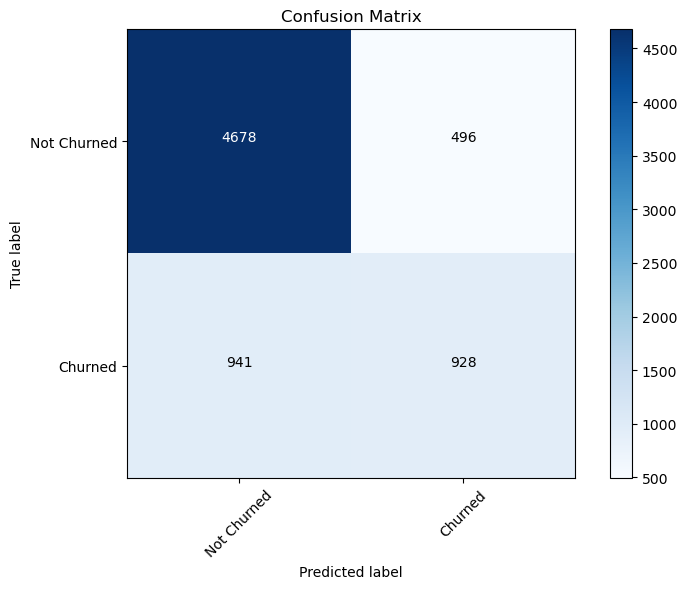

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix with annotations.
    """
    plt.figure(figsize=(8, 6))  # Set the figure size for better readability
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Adding text annotations for better clarity on numbers
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Define the original confusion matrix
confusion_matrix_result = np.array([[4678, 496],
                                    [941, 928]])

# Class names
class_names = ['Not Churned', 'Churned']

# Plot the confusion matrix using the function
plot_confusion_matrix(cm=confusion_matrix_result, classes=class_names)
plt.show()


In [40]:
# The proportion of all positives that are correctly classified
sensitivity = 928/(941 + 928)
specificity = 4678/(4678 + 496)
print(sensitivity, specificity)


0.49652220438737293 0.904136064940085


8) Create the ROC curve

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate - 1-Specificity')

Text(0, 0.5, 'True Positive Rate - Sensitivity')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

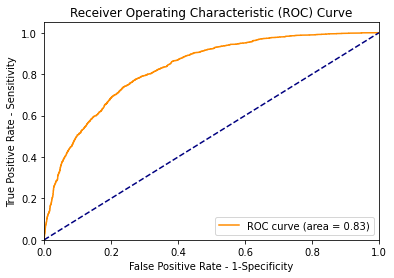

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y['Churn[Yes]'], predicted_p)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - 1-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
